In [61]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [62]:
my_data = pd.read_excel("smart.xlsx")
my_data[0:4]

,Jenis Barang,Jenis Sampah,Penjelasan,Metode Pengelolaan,Cara Pengelolaan
0,Batok Kelapa,Organik,Sampah organik adalah sampah yang bisa mengala...,Metode Kascing,1. Media yang digunakan dalam metode kascing i...
1,Bayam,Organik,Sampah organik adalah sampah yang bisa mengala...,Metode Kascing,1. Media yang digunakan dalam metode kascing i...
2,Biji Kurma,Organik,Sampah organik adalah sampah yang bisa mengala...,Metode Kascing,1. Media yang digunakan dalam metode kascing i...
3,Cangkang telur,Organik,Sampah organik adalah sampah yang bisa mengala...,Metode Kascing,1. Media yang digunakan dalam metode kascing i...


In [63]:
X = my_data[['Jenis Barang', 'Jenis Sampah', 'Penjelasan', 'Metode Pengelolaan', 'Cara Pengelolaan']].values
X[0:4]

array([['Batok Kelapa', 'Organik',
        'Sampah organik adalah sampah yang bisa mengalami pelapukan (dekomposisi) dan terurai menjadi bahan yang lebih kecil dan tidak berbau (sering disebut dengan kompos).',
        'Metode Kascing',
        "1. Media yang digunakan dalam metode kascing itu menggunakan tanah, kompos, dan kotoran hewan (misal kotoran sapi) dengan perbandingan 1 : 1 : 3; 2. Setelah semua diaduk, media tersebut dimasukkan ke dalam wadah dengan ditambahkan air, sehingga kadar air media menjadi 55%. ; 3. Barulah setelah itu, cacing tanah (cacing kalung) ditambahkan ke dalam media dengan jarak 5 cm.; 4. Tinggi media tidak boleh lebih dari 60 cm. Sebab perlu diingat bahwa cacing itu sifatnya sering masuk dan ke luar dari tanah untuk bernapas.; 5. Kisaran masuk ke dalam tanahnya itu sekitar 60 cm. Lebih dari itu, cacing tidak mau. Jadi kemungkinan besar, media yang berada di bawah 60 cm dari permukaan, tidak akan 'diolah' cacing.; 6. Sekitar 2 hari dari penambahan cacing, k

In [64]:
from sklearn import preprocessing
le_jenis = preprocessing.LabelEncoder()
le_jenis.fit(my_data['Jenis Sampah'].values)
X[:,1] = le_jenis.transform(X[:,1]) 


le_metodeO = preprocessing.LabelEncoder()
le_metodeO.fit(my_data['Metode Pengelolaan'].values)
X[:,3] = le_metodeO.transform(X[:,3])

le_langkah = preprocessing.LabelEncoder()
le_langkah.fit(my_data['Cara Pengelolaan'].values)
X[:,4] = le_langkah.transform(X[:,4])

le_barang = preprocessing.LabelEncoder()
le_barang.fit(my_data['Jenis Barang'].values)
X[:,0] = le_barang.transform(X[:,0])

le_kata = preprocessing.LabelEncoder()
le_kata.fit(my_data['Penjelasan'].values)
X[:,2] = le_kata.transform(X[:,2])
 

X[0:5]

array([[3, 1, 1, 1, 1],
       [6, 1, 1, 1, 1],
       [8, 1, 1, 1, 1],
       [15, 1, 1, 1, 1],
       [16, 1, 1, 1, 1]], dtype=object)

In [65]:
y = my_data["Cara Pengelolaan"]
y[0:4]

0    1. Media yang digunakan dalam metode kascing i...
1    1. Media yang digunakan dalam metode kascing i...
2    1. Media yang digunakan dalam metode kascing i...
3    1. Media yang digunakan dalam metode kascing i...
Name: Cara Pengelolaan, dtype: object

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [68]:
X_trainset

array([[74, 0, 0, 4, 5],
       [5, 1, 1, 3, 0],
       [19, 0, 0, 4, 5],
       [107, 1, 1, 3, 0],
       [58, 1, 1, 2, 2],
       [93, 0, 0, 0, 4],
       [41, 1, 1, 2, 2],
       [59, 1, 1, 2, 2],
       [101, 1, 1, 3, 0],
       [39, 1, 1, 2, 2],
       [81, 0, 0, 4, 5],
       [27, 1, 1, 3, 0],
       [60, 1, 1, 2, 2],
       [30, 1, 1, 3, 0],
       [44, 1, 1, 2, 2],
       [55, 1, 1, 2, 2],
       [63, 1, 1, 3, 0],
       [64, 1, 1, 3, 0],
       [84, 0, 0, 0, 4],
       [96, 0, 0, 5, 3],
       [103, 1, 1, 3, 0],
       [32, 1, 1, 3, 0],
       [72, 0, 0, 0, 4],
       [82, 0, 0, 5, 3],
       [29, 0, 0, 0, 4],
       [100, 1, 1, 3, 0],
       [17, 1, 1, 3, 0],
       [23, 0, 0, 0, 4],
       [78, 1, 1, 3, 0],
       [83, 0, 0, 5, 3],
       [76, 0, 0, 5, 3],
       [79, 0, 0, 0, 4],
       [46, 1, 1, 2, 2],
       [90, 1, 1, 3, 0],
       [25, 0, 0, 5, 3],
       [104, 1, 1, 3, 0],
       [56, 1, 1, 2, 2],
       [24, 0, 0, 5, 3],
       [14, 1, 1, 3, 0],
       [2, 0, 0, 4, 5

In [69]:
sampahTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
sampahTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
y_trainset

92     Pemanfaatan sampah anorganik untuk bahan daur ...
70     1. Komposter rumah tangga adalah tempat membua...
87     Pemanfaatan sampah anorganik untuk bahan daur ...
58     1. Komposter rumah tangga adalah tempat membua...
30     1. Metode komposter pot ini menggunakan pot.; ...
85     Jenis-jenis kerajinan tangan tersebut berasal ...
13     1. Metode komposter pot ini menggunakan pot.; ...
31     1. Metode komposter pot ini menggunakan pot.; ...
59     1. Komposter rumah tangga adalah tempat membua...
11     1. Metode komposter pot ini menggunakan pot.; ...
88     Pemanfaatan sampah anorganik untuk bahan daur ...
47     1. Komposter rumah tangga adalah tempat membua...
32     1. Metode komposter pot ini menggunakan pot.; ...
75     1. Komposter rumah tangga adalah tempat membua...
16     1. Metode komposter pot ini menggunakan pot.; ...
27     1. Metode komposter pot ini menggunakan pot.; ...
35     1. Komposter rumah tangga adalah tempat membua...
36     1. Komposter rumah tangg

In [71]:
sampahTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [73]:
predTree = sampahTree.predict(X_testset)

In [74]:
print (predTree [0:5])
print (y_testset [0:5])

['Istilah reusable ini merupakan sebuah tindakan untuk menggunakan berbagai sampah yang bersifat anorganik. Sampah-sampah tersebut ketika sudah tidak dipakai lagi, maka tidak perlu dibuang sehingga tidak menjadi\xa0limbah\xa0yang mengotori lingkungan sekitar.'
 'Istilah reusable ini merupakan sebuah tindakan untuk menggunakan berbagai sampah yang bersifat anorganik. Sampah-sampah tersebut ketika sudah tidak dipakai lagi, maka tidak perlu dibuang sehingga tidak menjadi\xa0limbah\xa0yang mengotori lingkungan sekitar.'
 "1. Media yang digunakan dalam metode kascing itu menggunakan tanah, kompos, dan kotoran hewan (misal kotoran sapi) dengan perbandingan 1 : 1 : 3; 2. Setelah semua diaduk, media tersebut dimasukkan ke dalam wadah dengan ditambahkan air, sehingga kadar air media menjadi 55%. ; 3. Barulah setelah itu, cacing tanah (cacing kalung) ditambahkan ke dalam media dengan jarak 5 cm.; 4. Tinggi media tidak boleh lebih dari 60 cm. Sebab perlu diingat bahwa cacing itu sifatnya sering m

In [75]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  1.0


In [76]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


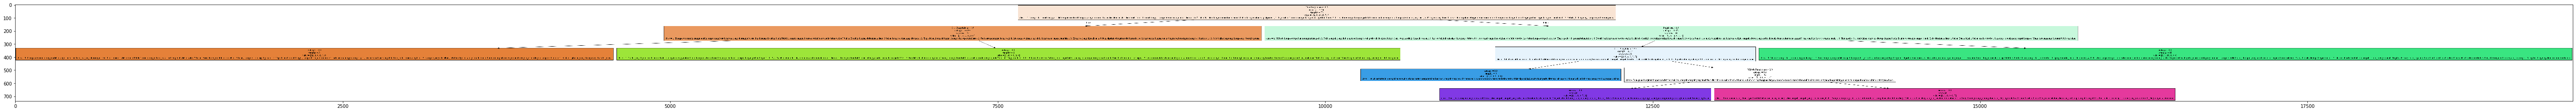

In [77]:
dot_data = StringIO()
filename = "sampahtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Cara Pengelolaan"].unique().tolist()
out=tree.export_graphviz(sampahTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')